<a href="https://colab.research.google.com/github/mandricic/CS5062/blob/master/etivity1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing classes

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Bank file

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/mandricic/CS5062/master/bank.csv')

# **QUESTION  to answer by exploring this dataset**
1.   What is most dependent on Client Subscription
*   Number of calls VS Call duration
2.   Is different age group more prone to subscribing



Explore first 20 rows

In [0]:
df.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no
5,46.0,self-employed,divorced,tertiary,no,926,yes,no,cellular,1,apr,463,1,133,3,failure,no
6,34.0,blue-collar,married,secondary,no,1924,yes,yes,cellular,1,apr,161,2,253,1,failure,no
7,45.0,services,divorced,secondary,no,396,yes,yes,cellular,1,apr,251,4,329,4,failure,no
8,58.0,management,divorced,tertiary,no,315,yes,no,cellular,1,apr,121,2,135,2,failure,no
9,49.0,management,divorced,tertiary,no,20727,no,no,cellular,1,apr,285,3,132,2,failure,no


Explore last 20 rows

In [0]:
df.tail(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1980,24.0,student,single,tertiary,no,834,no,no,cellular,9,sep,679,1,-1,0,NaN,yes
1981,24.0,student,single,secondary,no,139,no,no,cellular,9,sep,430,4,-1,0,NaN,yes
1982,28.0,management,married,tertiary,no,12,yes,no,cellular,9,sep,202,1,-1,0,NaN,yes
1983,24.0,admin.,single,secondary,no,166,no,no,cellular,10,sep,256,2,-1,0,NaN,yes
1984,58.0,management,married,tertiary,no,0,no,no,cellular,14,sep,358,2,-1,0,NaN,yes
1985,21.0,student,single,NaN,no,1506,no,no,cellular,14,sep,340,1,-1,0,NaN,yes
1986,40.0,entrepreneur,married,tertiary,no,3585,no,no,cellular,15,sep,506,3,-1,0,NaN,yes
1987,63.0,admin.,divorced,secondary,no,4680,no,no,cellular,15,sep,953,2,-1,0,NaN,yes
1988,24.0,student,single,secondary,no,8165,no,no,cellular,15,sep,216,1,-1,0,NaN,yes
1989,33.0,blue-collar,single,primary,no,611,no,no,telephone,16,sep,390,2,-1,0,NaN,yes


In [0]:
df['subscribed'].count()

2000

**Dataset has 2000 data rows.** I used 'subscribed' attribute for count because, that attribute doesn’t have NULL value. Dataset contains Numerical and categorical attributes.
**Subscribed** attribute can be set to Yes or No This exercise is focusing to find out what can affect subscribed attribute to be set to yes. For that I will look at Attribute **duration**, which contain value for duration of the call and other attribute that I will look at is **campaign**, which is numeric attribute that contains number of calls to single client for current campaign. I will also look at Attribute **Previous**, which contains the number of calls performed to single client before current campaign.





In [0]:
df.describe()


,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


**Age**- We have 2000 records in the Bank table, 12 values are missing <br/>
**pdays** - we can see that there are Clients that were not previously contacted <br/>
**campaign** - average time each Client was cantacted was 1.909<br/>
**previous** - on previous campaign, average time was 2.5 


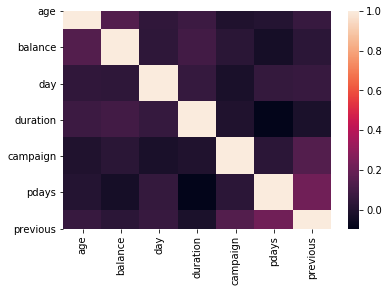

In [0]:
#correlation matrix
sns.heatmap(df.corr());

In [0]:
df['contact'].value_counts()

cellular     1663
telephone     146
Name: contact, dtype: int64

**cellular** is used as main contact device

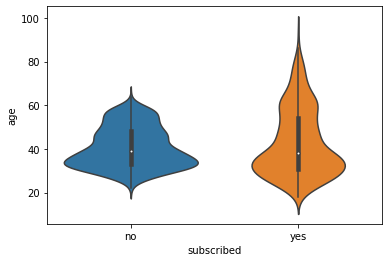

In [0]:
sns.violinplot(data=df, x='subscribed', y='age')
plt.show()

We can see that **clients** **over 65 and under 20** are all **subscribed**

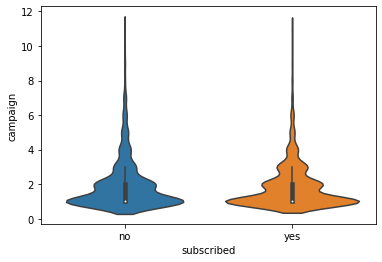

In [0]:
sns.violinplot(data=df, x='subscribed', y='campaign')
plt.show()

How many times client is contacted, doesn't make any difference in client subscription


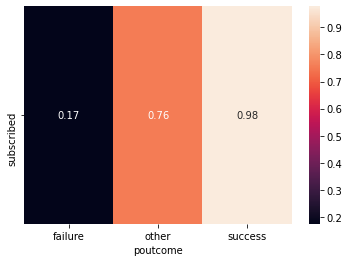

In [15]:
pivot_table_LCG = df.pivot_table(values='subscribed',  
                           columns='poutcome',
                           aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean())
sns.heatmap(pivot_table_LCG, annot=True)
plt.show()

If we look at outcome from previous campaign and fot effect they g=have on subscription. We can see that if poucome was set to success, there is 98% chance that client will be subscribed. whete for poucome with status failure there is big chance that subscribed will be negative.

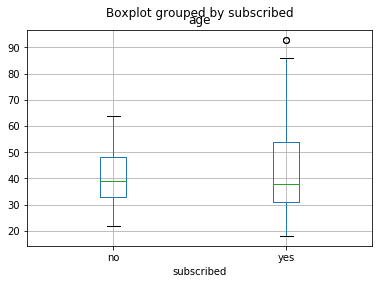

In [0]:
df.boxplot(column='age', by='subscribed') 
plt.show()

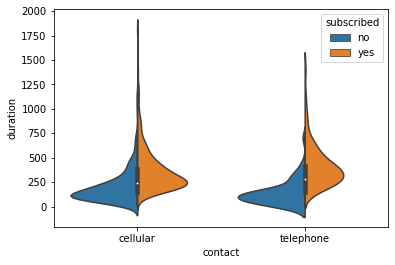

In [0]:
sns.violinplot(data=df, x='contact', y='duration', hue='subscribed', split=True)
plt.show()

violinplot shows that duration of the call affects subscription status- longer calls will get more subscriptions, and this would be the same for cellulars and for the telephones

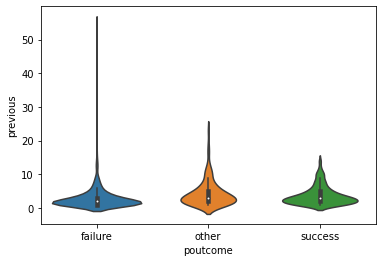

In [7]:
sns.violinplot(data=df, x='poutcome', y='previous')
plt.show()

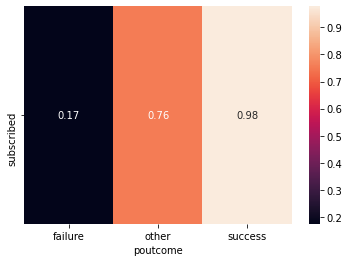

In [14]:
pivot_table_LCG = df.pivot_table(values='subscribed',  
                           columns='poutcome',
                           aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean())
sns.heatmap(pivot_table_LCG, annot=True)
plt.show()